<a href="https://colab.research.google.com/github/Marquezdan/Trabalho_3_ML/blob/main/Visualizing_adapted_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualização dos gradientes

Nesta parte, estamos focados em comparar diferentes otimizadores (SGD, SGD com Momentum e Adam) e visualizar a evolução dos gradientes ao longo do treinamento, a fim de entender como cada método lida com a atualização de parâmetros. A explicação detalhada de como cada variante (Momentum e Nesterov) funciona internamente será abordada mais adiante; aqui faremos apenas uma breve contextualização:

## SGD (Stochastic Gradient Descent):
É o método básico de descida de gradiente. Ele atualiza os parâmetros na direção oposta ao gradiente médio do batch.
## SGD+Momentum:
Adiciona a ideia de “inércia” no gradiente, suavizando as oscilações e acelerando a convergência.
## Adam:
Ajusta de maneira adaptativa a escala dos gradientes, usando estatísticas de primeira (média) e segunda ordem (variância) dos gradientes.


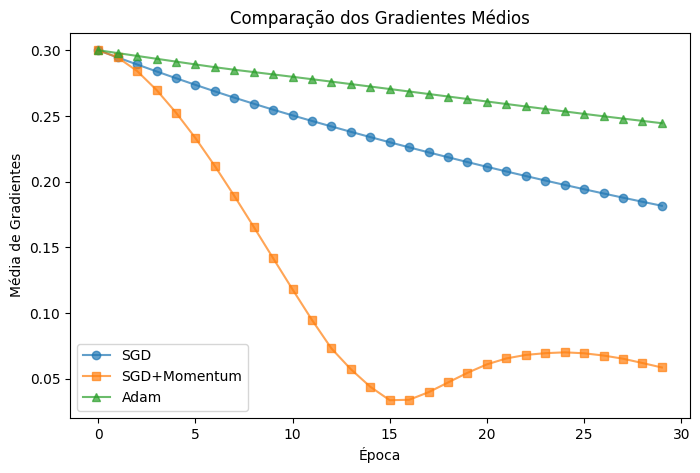

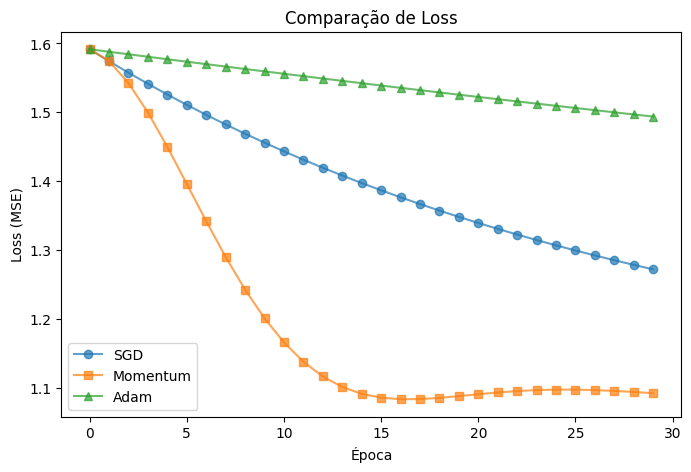

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 1. Criação de dados sintéticos
# 100 amostras, 10 features, 1 saída
X = torch.randn(100, 10)
y = torch.randn(100, 1)

# 2. Definição de 3 modelos (idênticos, mas independentes)
model_sgd = nn.Linear(10, 1)
model_momentum = nn.Linear(10, 1)
model_adam = nn.Linear(10, 1)

# Copiando os estados iniciais para ficarem iguais (opcional, mas legal para comparação)
# Você pode comentar se não quiser esse "start" igual
initial_state = model_sgd.state_dict()
model_momentum.load_state_dict(initial_state)
model_adam.load_state_dict(initial_state)

# 3. Critério de perda e Otimizadores
criterion = nn.MSELoss()

optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
optimizer_momentum = optim.SGD(model_momentum.parameters(), lr=0.01, momentum=0.9)
optimizer_adam = optim.Adam(model_adam.parameters(), lr=1e-3)

# 4. Função auxiliar para treinar

def train_model(model, optimizer, X, y, epochs=20):
    grad_history = []
    loss_history = []

    for epoch in range(epochs):
        # Forward
        outputs = model(X)
        loss = criterion(outputs, y)

        # Backward
        optimizer.zero_grad()
        loss.backward()

        # Coletando a média de gradientes
        total_grad = 0.0
        count = 0
        for param in model.parameters():
            if param.grad is not None:
                total_grad += param.grad.abs().mean().item()
                count += 1
        avg_grad = total_grad / count if count > 0 else 0

        grad_history.append(avg_grad)
        loss_history.append(loss.item())

        # Atualiza parâmetros
        optimizer.step()

    return grad_history, loss_history

# 5. Treinando cada modelo

epochs = 30  # número de épocas para comparação
grad_sgd, loss_sgd = train_model(model_sgd, optimizer_sgd, X, y, epochs)
grad_momentum, loss_momentum = train_model(model_momentum, optimizer_momentum, X, y, epochs)
grad_adam, loss_adam = train_model(model_adam, optimizer_adam, X, y, epochs)

# 6. Plotando a evolução dos gradientes
plt.figure(figsize=(8,5))
plt.plot(grad_sgd, label='SGD', marker='o', alpha=0.7)
plt.plot(grad_momentum, label='SGD+Momentum', marker='s', alpha=0.7)
plt.plot(grad_adam, label='Adam', marker='^', alpha=0.7)
plt.title("Comparação dos Gradientes Médios")
plt.xlabel("Época")
plt.ylabel("Média de Gradientes")
plt.legend()
plt.show()

# 7. Plotando a evolução da Perda
plt.figure(figsize=(8,5))
plt.plot(loss_sgd, label='SGD', marker='o', alpha=0.7)
plt.plot(loss_momentum, label='Momentum', marker='s', alpha=0.7)
plt.plot(loss_adam, label='Adam', marker='^', alpha=0.7)
plt.title("Comparação de Loss")
plt.xlabel("Época")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()


## Passo a passo:

1-> Geramos dados sintéticos (100 amostras, 10 features, 1 saída).

2-> Criamos três modelos lineares (um para cada otimizador). O estado inicial dos pesos é o mesmo para permitir comparações mais justas.

3-> Treinamos cada modelo por um determinado número de épocas, coletando a média dos gradientes em cada iteração.

4-> Plotamos como o gradiente evolui ao longo do tempo (para cada abordagem) e também a curva de perda (Loss), comparando as três estratégias.
Assim, conseguimos observar diferenças de comportamento em termos de:

Magnitude dos gradientes (mais “volátil” em métodos simples, mais estável em métodos com Momentum/Adam).

Velocidade de convergência (perda caindo mais rápido em certas técnicas).

No capítulo posterior, entraremos em detalhes sobre Momentum, Nesterov e outras variantes do SGD, explicando a teoria por trás de cada uma dessas extensões. Por ora, a análise principal é a visualização de como os gradientes se comportam em cada estratégia de otimização.